**The Sparks Foundation**

Name - **KANAKAM VISHAL**

**Prediction using Decision Tree Algorithm**

● From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

● Dataset : https://bit.ly/2G6sYx9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files 
upload = files.upload()

Saving Iris (1).csv to Iris (1) (1).csv


In [21]:
df = pd.read_csv('Iris (1).csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


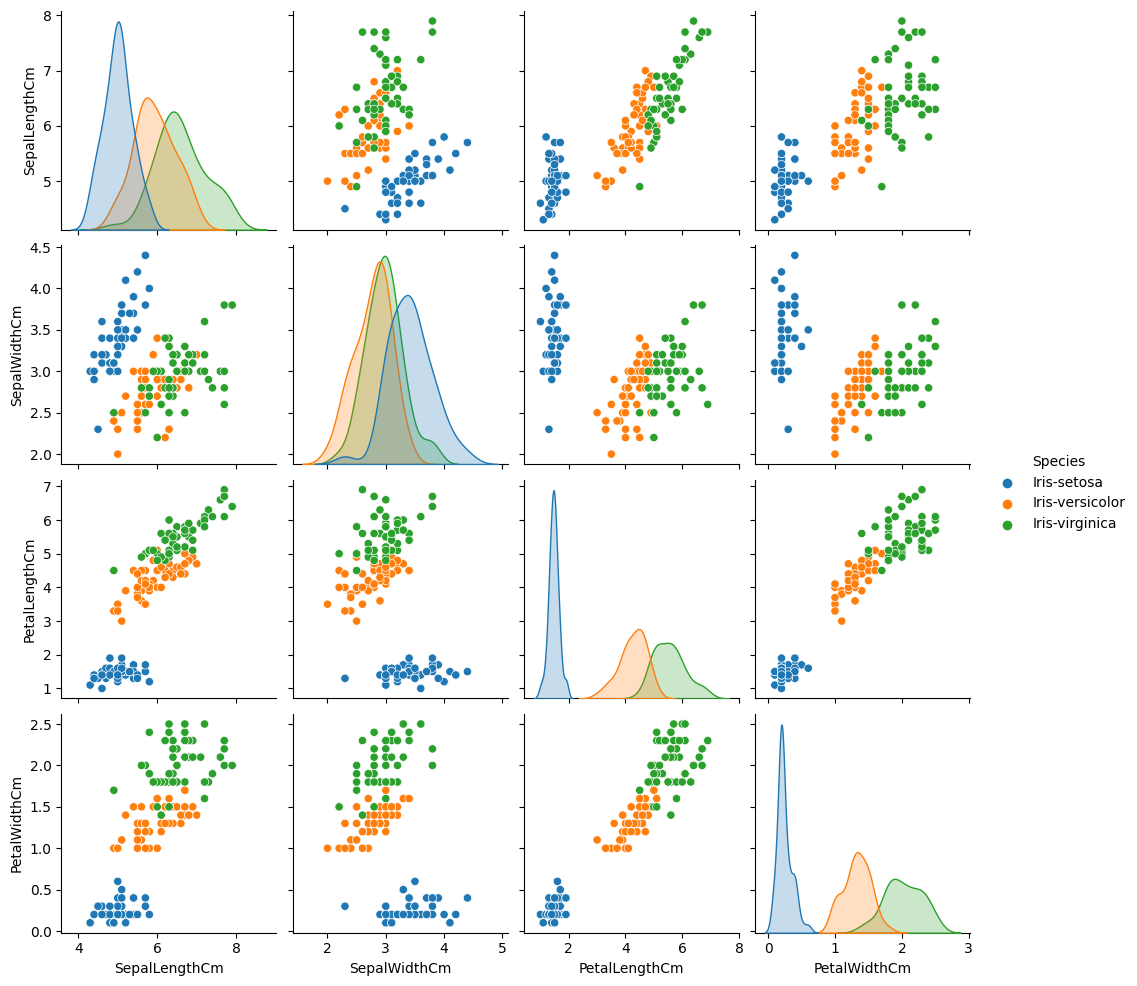

In [22]:
df.drop("Id",axis=1,inplace=True)
sns.pairplot(df,hue="Species")

In [23]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [24]:
x = df.iloc[1:,:-1].values  
y = df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

<Axes: >

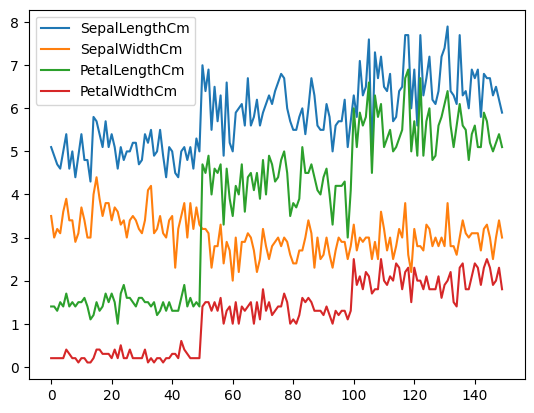

In [25]:
df.plot(kind = "line")

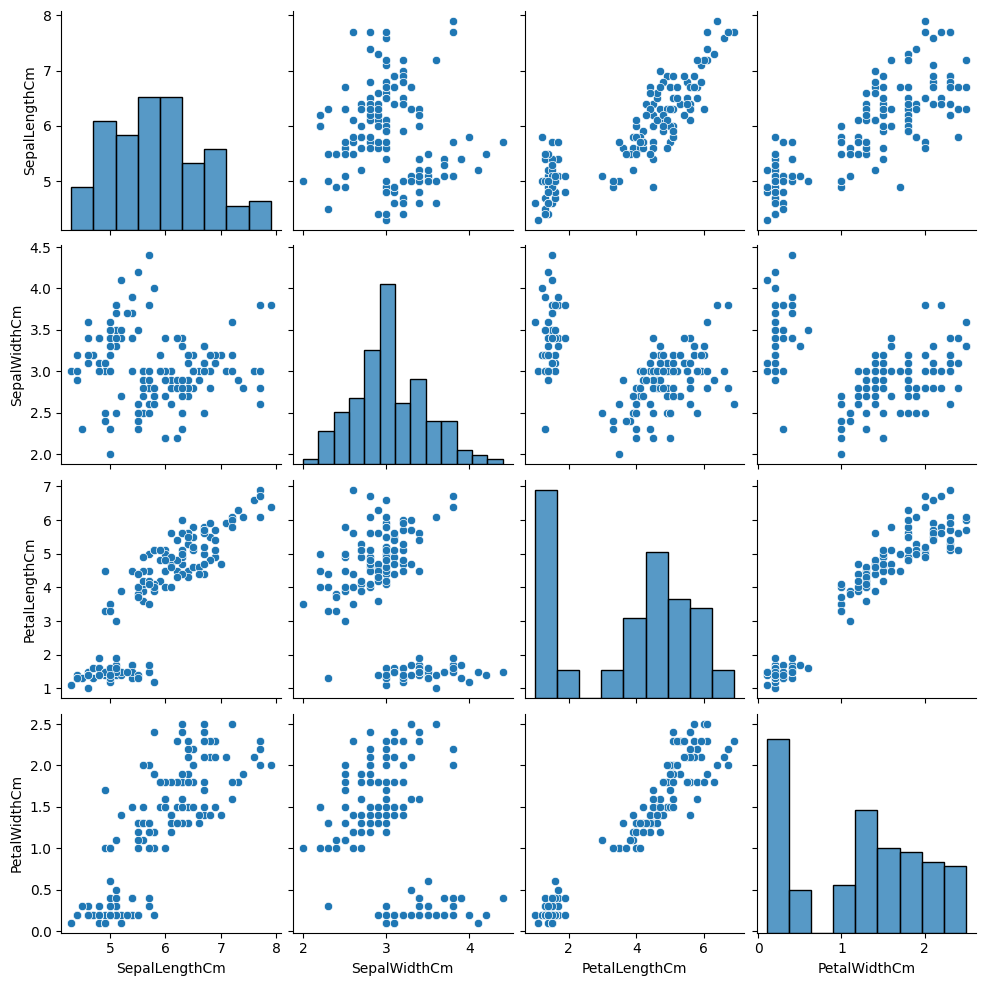

In [26]:
sns.pairplot(data = df)

In [27]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#Splitting data into training and testing data
x=df.drop('Species',axis=1)
y=df.Species
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
25,5.0,3.0,1.6,0.2
21,5.1,3.7,1.5,0.4
92,5.8,2.6,4.0,1.2
9,4.9,3.1,1.5,0.1
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [28]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)   

In [29]:
#Creating classifier and training it on train data
dtree = DecisionTreeClassifier(max_depth=5,criterion='entropy', random_state=0)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [30]:
#Predicting the test set result  
y_pred= dtree.predict(X_test) 
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [31]:
#Creating the Confusion matrix and r2_score 
from sklearn.metrics import confusion_matrix
score = dtree.score(X_test,y_test)
print("The final accuracy is :",(score*100))
cm= confusion_matrix(y_test, y_pred)
cm
 

The final accuracy is : 95.55555555555556


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

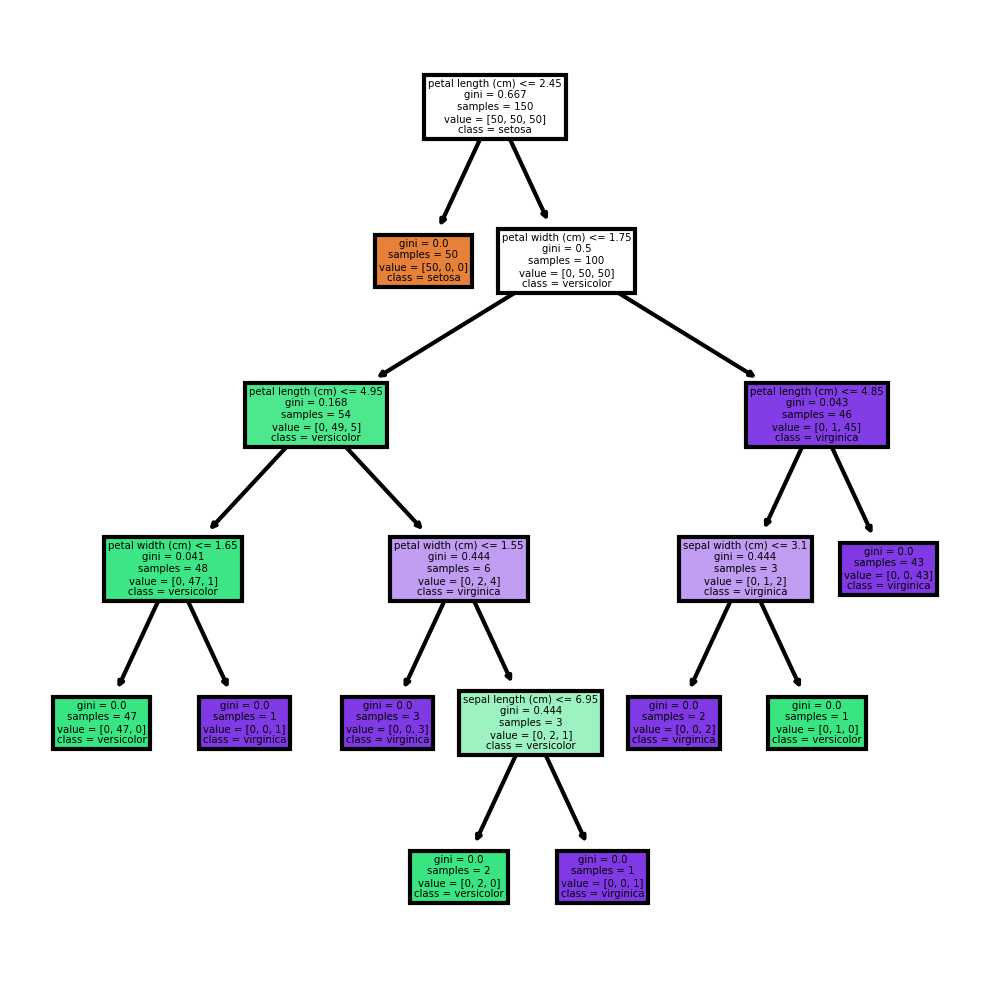

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X, y = load_iris(return_X_y=True)

# Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5)

# Train the model on the data
clf.fit(X, y)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);
